### Charger les images du dataset et vérifier leurs extensions (jpeg, jpg, bmp, png)

In [31]:
import os
import cv2

dataset_path = os.getcwd() + '/../data/raw/Data'
allowed_ext = ['jpeg', 'jpg', 'bmp', 'png']

images = []
labels = []

for label_name in os.listdir(dataset_path):
    label_path = os.path.join(dataset_path, label_name)

    try:
        for file_name in os.listdir(label_path):
            file_path = os.path.join(label_path, file_name)

            extension = os.path.splitext(file_path)[1][1:]

            if (extension not in allowed_ext):
                continue

            img = cv2.imread(file_path)

            resized_img = cv2.resize(img, (224, 224))

            images.append(resized_img)
            labels.append(label_name)

    except:
        print(label_path, "is not a directory")

### Explorer la structure des dossiers pour identifier les classes disponibles.

In [17]:
dataset_path = os.getcwd() + '/../data/raw/Data'

for label_name in os.listdir(dataset_path):
    print(label_name)

glioma
meningioma
notumor
pituitary


### Convertir les listes en tableaux NumPy.

In [27]:
import numpy as np

X = np.array(images, dtype=np.float32)

y = np.array(labels)

### Normaliser les valeurs des pixels dans la plage [0, 1].

In [ ]:
for i in range(len(X)):
    X[i] = X[i] / 255.0


### Encoder les labels avec LabelEncoder ou to_categorical.

In [33]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
y_encoded = le.fit_transform(labels)

y_categorical = to_categorical(y_encoded)

### Diviser les données en ensembles d’entraînement et de test (train/test split).

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Afficher un échantillon d’images pour chaque classe.


--- meningioma ---



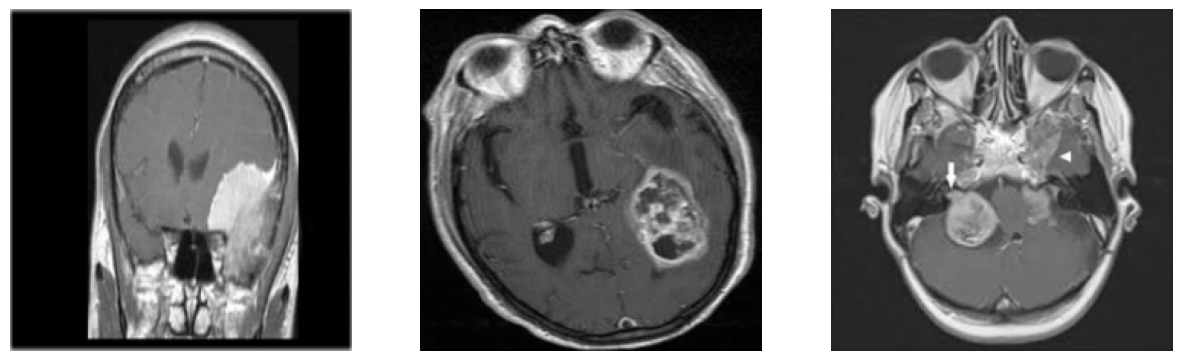


--- notumor ---



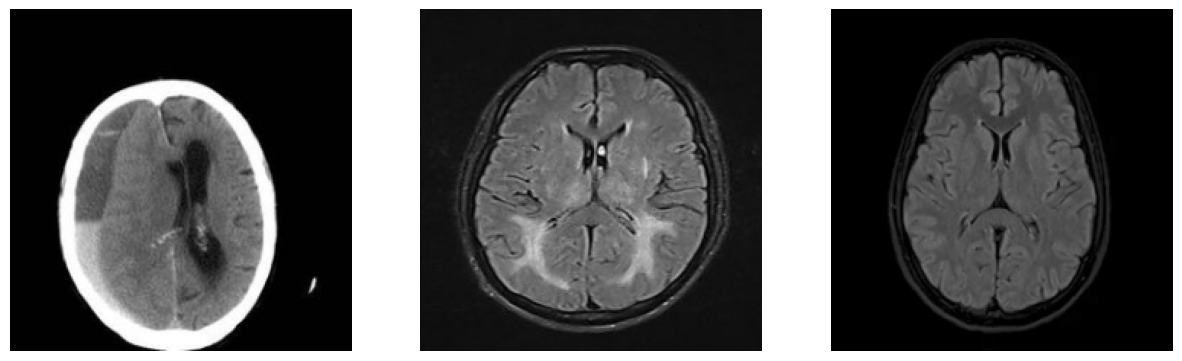


--- glioma ---



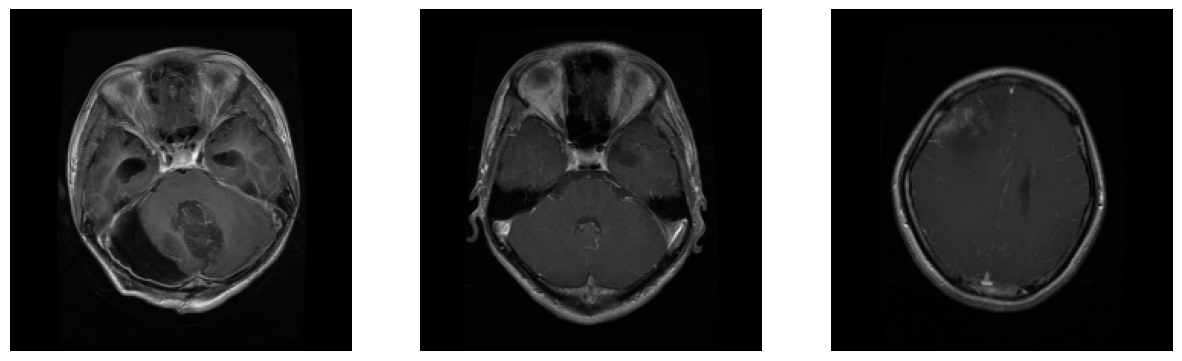


--- pituitary ---



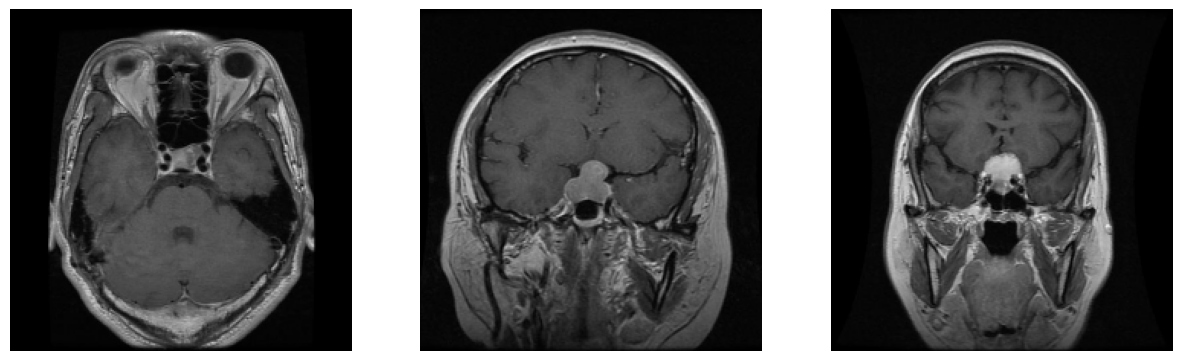

In [71]:
import matplotlib.pyplot as plt

combined_list = list(zip(images, labels))

for label in set(labels):
    images_list = list(filter(lambda x: x[1] == label, combined_list))

    print('\n---', label, '---\n')

    plt.figure(figsize=(15, 5))
    
    for i in range(3):
        img = images_list[i][0]


        plt.subplot(1, 3, i + 1)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.imshow(img_rgb)
        plt.axis('off')
    plt.show()

